In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [14]:
#exercise n.1

#Generating a 3d dataset 
N=1000
x1=np.random.normal(0, 1, N)
x2=x1+np.random.normal(0, 3, N)
x3=2*x1+x2

dataset_matrix=np.array([x1, x2, x3])
print('Evalutaed dataset:\n', dataset_matrix, '\n')


#Finding the eigenvectors and eigenvalues of the covariance matrix 
#EIGENDECOMPOSITION
cov_matrix=np.cov(dataset_matrix)
print('Covariance matrix:\n', cov_matrix, '\n')

l, V=la.eig(cov_matrix)
sort_index=np.argsort(l,axis=-1)[::-1] #Sorting the eigenvalues considering a descending order to match SVD order 
l=l[sort_index]
V=V[:, sort_index] #Matching the eigenvectors order to the one imposed 
print('EIGENDECOMPOSITION')
print('Real eigenvalues: ', np.real_if_close(l))
print('Corresponding eigenvectors:\n', V)

    
#SVD 
U, S, Vt = la.svd(dataset_matrix)
print('\nSVD')
print('Eigenvalues: ', S**2/(N-1))
print('Corresponding eigenvectors:\n', U)

Evalutaed dataset:
 [[ 0.30656345 -0.82824113 -0.02776541 ... -1.6107829  -0.90971587
  -0.62018089]
 [-0.59963832  1.00592315  0.13249586 ... -1.35917644 -2.56376305
  -4.28695278]
 [ 0.01348857 -0.65055911  0.07696504 ... -4.58074223 -4.3831948
  -5.52731456]] 

Covariance matrix:
 [[ 0.9873549   0.86781746  2.84252726]
 [ 0.86781746  9.43799631 11.17363123]
 [ 2.84252726 11.17363123 16.85868574]] 

EIGENDECOMPOSITION
Real eigenvalues:  [2.52485425e+01 2.03549446e+00 8.35982021e-16]
Corresponding eigenvectors:
 [[-0.11534863  0.5657102  -0.81649658]
 [-0.57750203 -0.70698284 -0.40824829]
 [-0.8081993   0.42443755  0.40824829]]

SVD
Eigenvalues:  [2.52487233e+01 2.03731190e+00 2.65550779e-30]
Corresponding eigenvectors:
 [[-0.11533466  0.56571304 -0.81649658]
 [-0.57751949 -0.70696858 -0.40824829]
 [-0.80818881  0.42445751  0.40824829]]


In [16]:
#Dimension reduction via PCA for p=3 (k=1,2)
Lambda = np.diag(np.real_if_close(l))
var1=[abs(Lambda[i,i])/Lambda.trace() for i in range(0,3)]
var2=[abs(Lambda[0,0] + Lambda[1,1])/Lambda.trace(),abs(Lambda[0,0] + Lambda[2,2])/Lambda.trace(),abs(Lambda[2,2] + Lambda[1,1])/Lambda.trace()]
for i in range(0,3):
    print('By selecting the component', i+1, 'we retain %.2f%% of the total variability.' % (var1[i] * 100))
print('By selecting the components (1,2) we retain %.2f%% of the total variability.' % (var2[0] * 100))
print('By selecting the components (1,3) we retain %.2f%% of the total variability.' % (var2[1] * 100))
print('By selecting the components (2,3) we retain %.2f%% of the total variability.' % (var2[2] * 100))

#The variability of the dataset is completely related to the first and second components while the third one does not
#contribute. This result was however expected since the third component is dependent from the first 2.
#It is thus possible to reduce the dimensionality of the system to k=2 while retaining at least 99% of the total 
#variability.


#Redefining the dataset according to the new basis from the PCA 
dm_rot=np.dot(V.T, dataset_matrix) #rotating the data by multiplying by V transpose 
dm_reduced=np.delete(dm_rot, np.argmin(np.real_if_close(l)), 0) #reducing the matrix

By selecting the component 1 we retain 92.54% of the total variability.
By selecting the component 2 we retain 7.46% of the total variability.
By selecting the component 3 we retain 0.00% of the total variability.
By selecting the components (1,2) we retain 100.00% of the total variability.
By selecting the components (1,3) we retain 92.54% of the total variability.
By selecting the components (2,3) we retain 7.46% of the total variability.


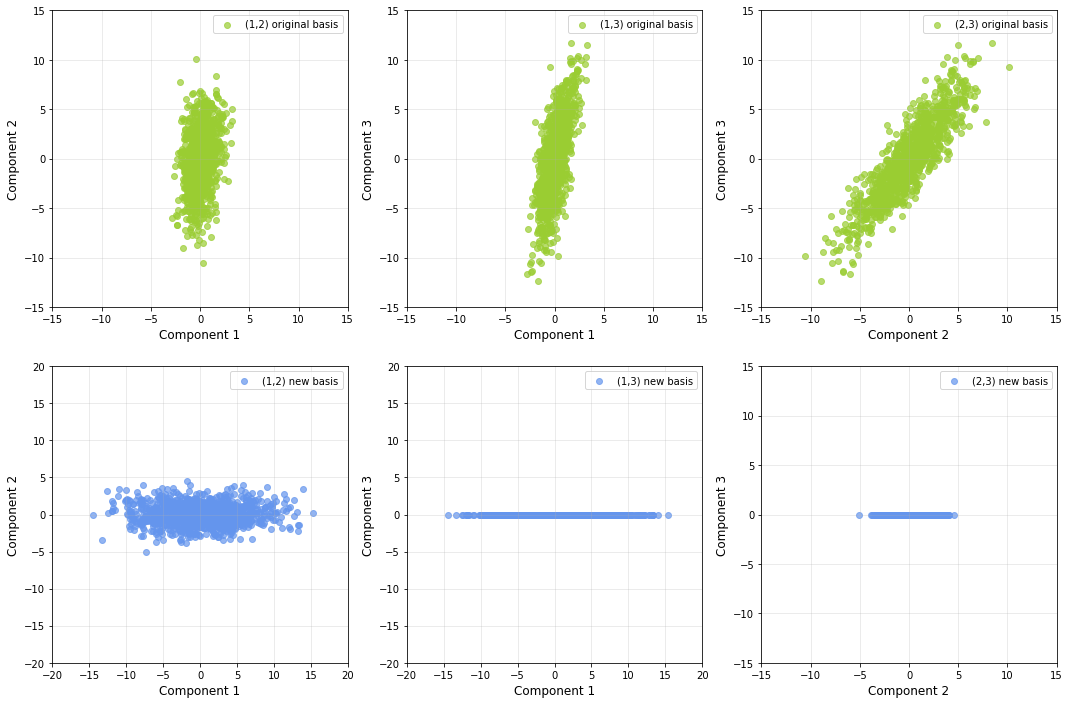

In [17]:
#Plotting the data (original and new basis)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

ax1.scatter(dataset_matrix[0, :], dataset_matrix[1, :],label='(1,2) original basis',color='yellowgreen',alpha=0.7)
ax1.set_xlabel('Component 1', fontsize=12)
ax1.set_ylabel('Component 2', fontsize=12)
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.legend(loc = 'best')
ax1.grid(alpha=0.3)

ax2.scatter(dataset_matrix[0, :], dataset_matrix[2, :],label='(1,3) original basis',color='yellowgreen',alpha=0.7)
ax2.set_xlabel('Component 1', fontsize=12)
ax2.set_ylabel('Component 3', fontsize=12)
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.legend(loc = 'best')
ax2.grid(alpha=0.3)

ax3.scatter(dataset_matrix[1, :], dataset_matrix[2 :],label='(2,3) original basis',color='yellowgreen',alpha=0.7)
ax3.set_xlabel('Component 2', fontsize=12)
ax3.set_ylabel('Component 3', fontsize=12)
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.legend(loc = 'best')
ax3.grid(alpha=0.3)

ax4.scatter(dm_rot[0, :], dm_rot[1, :],label='(1,2) new basis',color='cornflowerblue',alpha=0.7)
ax4.set_xlabel('Component 1', fontsize=12)
ax4.set_ylabel('Component 2', fontsize=12)
ax4.set_xlim(-20,20)
ax4.set_ylim(-20,20)
ax4.legend(loc = 'best')
ax4.grid(alpha=0.3)

ax5.scatter(dm_rot[0, :], dm_rot[2, :],label='(1,3) new basis',color='cornflowerblue',alpha=0.7)
ax5.set_xlabel('Component 1', fontsize=12)
ax5.set_ylabel('Component 3', fontsize=12)
ax5.set_xlim(-20,20)
ax5.set_ylim(-20,20)
ax5.legend(loc = 'best')
ax5.grid(alpha=0.3)

ax6.scatter(dm_rot[1, :], dm_rot[2 :],label='(2,3) new basis',color='cornflowerblue',alpha=0.7)
ax6.set_xlabel('Component 2', fontsize=12)
ax6.set_ylabel('Component 3', fontsize=12)
ax6.set_xlim(-15,15)
ax6.set_ylim(-15,15)
ax6.legend(loc = 'best')
ax6.grid(alpha=0.3)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [18]:
#Exercise n.2

dataset_noise=dataset_matrix
for i in range(10):
    dataset_noise=np.vstack([dataset_noise, np.random.normal(0, 1/(20+i), dataset_matrix.shape[1])])
print('New noisy dataset:\n', dataset_noise, '\n')
    
#Applying the PCA procedure 
cov_noise=np.cov(dataset_noise)
l1, V1=la.eig(cov_noise)
Lambda1=np.diag(np.real_if_close(l1))

#One can indeed verify that all the noise components slightly contribute to the variability of the data 
#(less than 0.5% considering also the third component not related to the noise); in fact:
print ('By selecting the components (1,2) we retain %.2f%% of the total variability.' % (abs(Lambda1[0,0] + Lambda1[1,1])/Lambda1.trace() * 100))
#Also in this case the two components that mainly contribute to the variability of the data are 1 and 2.



New noisy dataset:
 [[ 3.06563445e-01 -8.28241132e-01 -2.77654091e-02 ... -1.61078290e+00
  -9.09715873e-01 -6.20180890e-01]
 [-5.99638324e-01  1.00592315e+00  1.32495861e-01 ... -1.35917644e+00
  -2.56376305e+00 -4.28695278e+00]
 [ 1.34885673e-02 -6.50559115e-01  7.69650425e-02 ... -4.58074223e+00
  -4.38319480e+00 -5.52731456e+00]
 ...
 [ 2.21130439e-03  4.66975425e-02 -9.48903488e-03 ... -1.89214149e-02
  -2.33904145e-02 -1.04038437e-02]
 [ 6.54302693e-03  1.49196542e-02  1.02274229e-02 ...  5.20011018e-03
  -1.15638998e-02  8.00868513e-03]
 [ 1.39136663e-02  3.56542442e-02 -1.29775604e-02 ... -6.17312766e-02
   2.00918408e-03 -6.01647804e-02]] 

By selecting the components (1,2) we retain 99.94% of the total variability.


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [74]:
#Exercise n.3
dataset=pd.read_csv('./data/magic04.data', index_col = False)
labels=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
dataset.columns=labels

dataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [75]:
#Obtaining an array with the signal (g corresponds to signals, h to noise)
dataset=dataset[dataset['class']=='g']
dataset=dataset.drop(['class'], axis=1) #once obtained the signal we can remove the 'class' data
data=dataset.to_numpy()
data=data.reshape((data.shape[1], data.shape[0])) #created and reshaped and array for the data

cov=np.cov(data[:,:1000])
l_2, V2=la.eig(cov)

sort_2=np.argsort(l_2,axis=-1)[::-1] # sorting l_2 considering a descending order
l_2=np.real_if_close(l_2)
l_2=l_2[sort_2]

Lambda2=np.diag(l_2)
pca=l_2/np.trace(Lambda2)

min_v=0.95 #threshold (%) to evaluate the variability provided by the data components
var=0

for i in range(1, len(pca)+1):
    var=pca[:i].sum()
    if var>min_v:
        print('By selecting k=%d we retain %.2f%% of the total variability.' %(i, var*100))

By selecting k=9 we retain 97.81% of the total variability.
By selecting k=10 we retain 100.00% of the total variability.
